In [1]:
#ziyu xia zix25

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas


In [2]:
#Here we shows top 5 rows as a example
pg = pd.read_csv("playground.csv", encoding='cp1252')
pg.head(5)

,id,name,equipment_type,manufacturer,safety_surface_type,ada_accessible,street_number,street,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude,number
0,1780722587,Able Long Playground,Play Area 2 to 5,Little Tykes,Pour in Place,f,211.0,Coast Ave,Beechview,4,19,42003192000,5,19,6,4ÔÂ28ÈÕ,40.408381,-80.028520,1
1,702514290,North Ave. Playground,Play Area 2 to 5,Playworld,SofSurfaces,f,377.0,W North Ave,Allegheny Center,1,22,42003562700,1,22,1,1ÔÂ7ÈÕ,40.454526,-80.010188,1
2,1267038491,Vietnam Veteran's Playground,Slide,Little Tykes,SofSurfaces,f,108.0,Panther Hollow Rd,Squirrel Hill South,5,14,42003980500,3,14,4,2ÔÂ8ÈÕ,40.434185,-79.944323,1
3,14898932,Schenley Overlook Playground,Swing 2 Bays,Little Tykes,SofSurfaces,t,NaN,Overlook Dr,Squirrel Hill South,5,14,42003980500,3,14,4,2ÔÂ8ÈÕ,40.432130,-79.947774,1
4,204832406,Schenley Overlook Playground,Slide,Little Tykes,SofSurfaces,f,NaN,Overlook Dr,Squirrel Hill South,5,14,42003980500,3,14,4,2ÔÂ8ÈÕ,40.432215,-79.947817,1


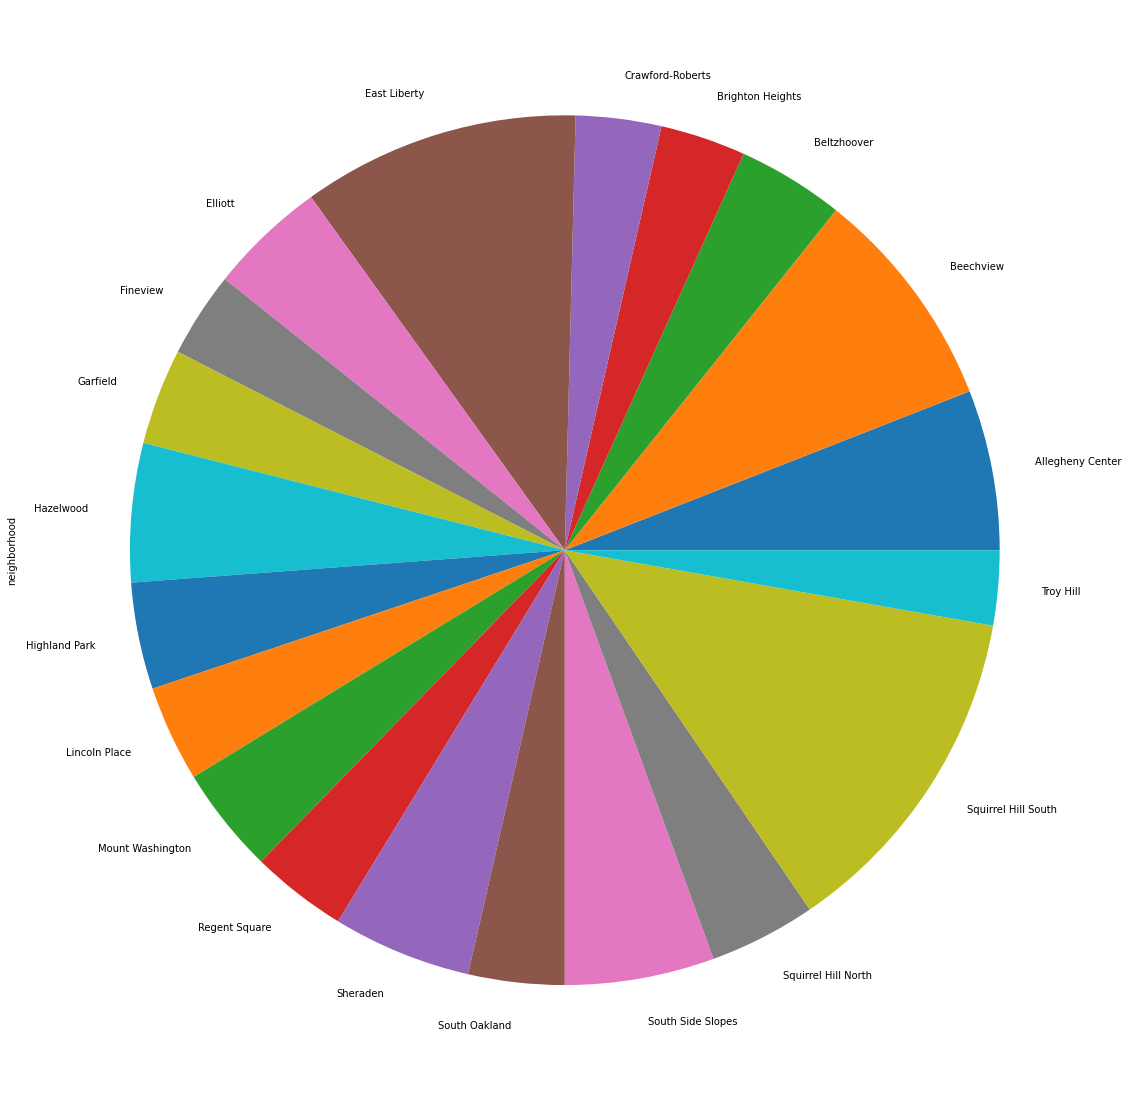

In [3]:
#Plot the pie graph for top 20
pg["neighborhood"].value_counts().head(20).sort_index().plot.pie(y='neighborhood', 
                                                  subplots=False, 
                                                  figsize=(20, 20))

In [4]:
num_pg = pg.groupby("neighborhood").sum()['number']
num_pg.sort_values(ascending=False)

neighborhood
Squirrel Hill South    32
East Liberty           26
Beechview              21
Allegheny Center       15
South Side Slopes      14
                       ..
Central Oakland         2
Lower Lawrenceville     2
Westwood                2
Strip District          1
West Oakland            1
Name: number, Length: 68, dtype: int64

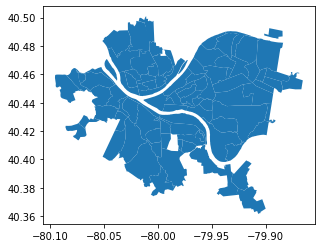

In [5]:
neighborhoods = geopandas.read_file("Neighorhoods/Neighborhoods_.shp") # read in the shapefile
neighborhoods.plot() 

In [6]:
# do the merge
pg_map = neighborhoods.merge(num_pg, how='left', left_on='hood', right_on='neighborhood')
# look at the head to confirm it merged correctly
pg_map[['hood','number','geometry']].head()

,hood,number,geometry
0,Central Oakland,2.0,"POLYGON ((-79.95304 40.44203, -79.95302 40.442..."
1,North Oakland,NaN,"POLYGON ((-79.95455 40.45882, -79.95427 40.458..."
2,West Oakland,1.0,"POLYGON ((-79.96230 40.44294, -79.96220 40.442..."
3,Crawford-Roberts,8.0,"POLYGON ((-79.98275 40.44641, -79.98273 40.446..."
4,Strip District,1.0,"POLYGON ((-79.97494 40.45629, -79.97484 40.456..."


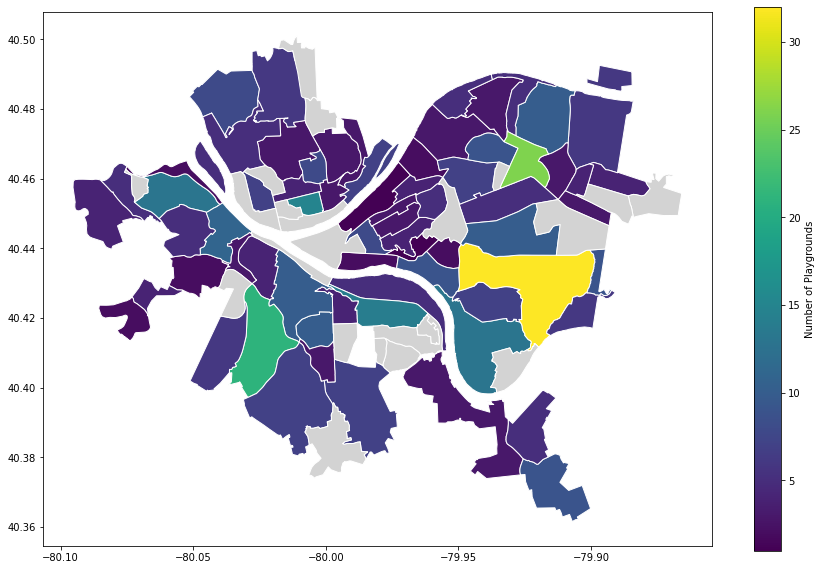

In [7]:
#Plot the map graph for all the data
pg_map.plot(column='number', # set the data to be used for coloring
#                cmap='OrRd',              # choose a color palette
               edgecolor="white",        # outline the districts in white
               legend=True,              # show the legend
               legend_kwds={'label': "Number of Playgrounds"}, # label the legend
               figsize=(15, 10),         # set the size
               missing_kwds={"color": "lightgrey"} # set disctricts with no data to gray
               )

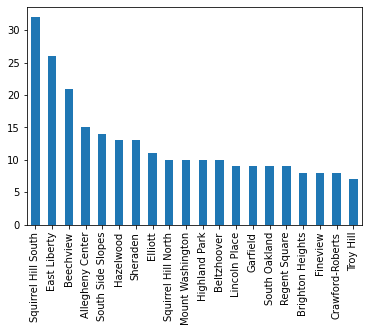

In [8]:
#Plot the bar graph for top 20
pg["neighborhood"].value_counts().head(20).plot(kind = 'bar')

The data utilized in the playground analysis is sourced from the WPRDC website(City of Pittsburgh Playgrounds, https://data.wprdc.org/dataset/playgrounds). The dataset indicates that there are 68 neighborhoods that have at least one playground. Squirrel Hill South has the highest number of playgrounds among them, with a total of 32. East Liberty takes second place with 26 playgrounds, followed by Beechview in third with 21. While the bar and pie graphs exclusively display the top 20 entries, the map exhibits all of the data.